In [73]:
# Standard imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
#import scipy.sparse
%matplotlib inline

In [74]:
train = pd.read_csv('data/train_dataframe.tsv', sep='\t', index_col=0)
test = pd.read_csv('data/test_dataframe.tsv', sep='\t', index_col=0)

In [75]:
cols = list(train.columns.values)
genre_cols = cols[-22:]
print(len(genre_cols))
print(genre_cols)

22
['g_action', 'g_adventure', 'g_animation', 'g_biography', 'g_comedy', 'g_crime', 'g_documentary', 'g_drama', 'g_family', 'g_fantasy', 'g_film-noir', 'g_history', 'g_horror', 'g_music', 'g_musical', 'g_mystery', 'g_romance', 'g_sci-fi', 'g_sport', 'g_thriller', 'g_war', 'g_western']


In [396]:
f_names = cols[:8]

In [76]:
X_train = train[train.columns[~train.columns.isin(genre_cols)]]
y_train = train[train.columns[ train.columns.isin(genre_cols)]]

X_test = test[test.columns[~test.columns.isin(genre_cols)]]
y_test = test[test.columns[ test.columns.isin(genre_cols)]]


In [77]:
# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 
# 2. make a scaler
my_standard_scaler = StandardScaler()
# 3. fit the scaler
my_standard_scaler.fit(X_train)
# 4. transform the data
X_train_s = my_standard_scaler.transform(X_train)
X_test_s = my_standard_scaler.transform(X_test)

In [78]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [28]:
%%time
#y_pred = OneVsRestClassifier(LinearSVC(random_state=123, max_iter=3000), n_jobs=-1).fit(X_train_s, y_train).predict(X_test_s)

Wall time: 22min 22s


In [ ]:
first_model = joblib.load('models/my_1vr_linear_svc_default.pkl')

In [79]:
%%time
my_model = OneVsRestClassifier(LinearSVC(random_state=123, max_iter=3000), n_jobs=-1).fit(X_train_s, y_train)

Wall time: 22min 6s


In [92]:
# EXPORT AND SAVE THE MODEL
from sklearn.externals import joblib

joblib.dump(my_model, 'models/my_1vr_linear_svc_default.pkl')

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['models/my_1vr_linear_svc_default.pkl']

In [80]:
y_pred = my_model.predict(X_test_s)

In [93]:
y_train_pred = my_model.predict(X_train_s)

In [97]:
my_model.multilabel_
#my_model.predict_proba(X_train_s)

True

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.4966490612933292

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.043669285048595394

In [382]:
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_pred_df.columns = genre_cols
y_train_pred_df

,g_action,g_adventure,g_animation,g_biography,g_comedy,g_crime,g_documentary,g_drama,g_family,g_fantasy,g_film-noir,g_history,g_horror,g_music,g_musical,g_mystery,g_romance,g_sci-fi,g_sport,g_thriller,g_war,g_western
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22526,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22527,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
22528,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
22529,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = genre_cols
y_pred_df

,g_action,g_adventure,g_animation,g_biography,g_comedy,g_crime,g_documentary,g_drama,g_family,g_fantasy,g_film-noir,g_history,g_horror,g_music,g_musical,g_mystery,g_romance,g_sci-fi,g_sport,g_thriller,g_war,g_western
0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
7507,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7508,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7509,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [383]:
# Train set predictions y_train, y_train_pred)
for g in genre_cols:
    score = accuracy_score(y_train[g], y_train_pred_df[g])
    print(f'{score:0.4f}  {g}')

0.9907  g_action
1.0000  g_adventure
1.0000  g_animation
1.0000  g_biography
0.8335  g_comedy
0.9893  g_crime
1.0000  g_documentary
0.7929  g_drama
1.0000  g_family
1.0000  g_fantasy
1.0000  g_film-noir
0.9999  g_history
1.0000  g_horror
1.0000  g_music
1.0000  g_musical
1.0000  g_mystery
0.8752  g_romance
1.0000  g_sci-fi
1.0000  g_sport
0.8730  g_thriller
0.9989  g_war
0.9980  g_western


In [387]:
test_scores = pd.DataFrame.from_dict(test_acc_dict,orient='index')

In [389]:
test_scores.to_csv('test_scores_model1.csv')

In [384]:
test_acc_dict = {}
# Test set predictions
for g in genre_cols:
    score = accuracy_score(y_test[g], y_pred_df[g])
    test_acc_dict.update( {g[2:] : score} )
    print(f'{score:0.4f}  {g}')

0.7743  g_action
0.8273  g_adventure
0.9404  g_animation
0.8939  g_biography
0.7119  g_comedy
0.7795  g_crime
0.9549  g_documentary
0.6700  g_drama
0.8803  g_family
0.8603  g_fantasy
0.9823  g_film-noir
0.9019  g_history
0.8799  g_horror
0.8919  g_music
0.9294  g_musical
0.8223  g_mystery
0.7545  g_romance
0.8958  g_sci-fi
0.9695  g_sport
0.7485  g_thriller
0.9248  g_war
0.9614  g_western


In [84]:
y_test.sum().sum()

20076

In [85]:
y_pred.sum()

24652

In [86]:
coefs = my_model.coef_

In [87]:
coef_df = pd.DataFrame(coefs, index=genre_cols, columns=X_train.columns)
coef_df

,f_release_year,f_release_month,f_runtime,f_word_count_long,f_imdb_rating,f_num_imdb_votes,f_num_user_reviews,f_num_critic_reviews,00,000,10,100,11,12,13,13th,14,15,16,17,17th,18,18th,19,1900,1920,1930,1936,1939,1940,1941,1942,1943,1944,1945,1950,1955,1959,1960,1962,1963,1964,1965,1966,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1984,1987,1988,1989,1990,1991,1992,1993,1994,1995,1999,19th,20,200,2000,2001,2002,2003,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,20th,21,21st,22,23,24,25,27,28,2nd,30,300,35,40,400,50,500,60,70,80,90,aaron,abandon,abbi,abduct,abil,abl,aboard,abort,about,abraham,abroad,abruptli,absenc,absent,absolut,absorb,absurd,abus,academ,academi,accept,access,accid,accident,acclaim,accompani,accomplic,accomplish,accord,account,accus,ace,achiev,acid,acknowledg,acquaint,acquir,across,act,action,activ,activist,actor,actress,actual,ad,adam,adapt,add,addict,addit,address,aditya,adjust,administr,admir,admiss,admit,adolesc,adolf,adopt,ador,adrift,adult,adulthood,advanc,advantag,adventur,adversari,advertis,advic,advis,advisor,advoc,affair,affect,afflict,affluent,afford,afghanistan,afraid,africa,african,after,afterlif,aftermath,afternoon,afterward,ag,against,age,agenc,agenda,agent,aggress,agn,ago,agre,agreement,ahead,aid,ail,aim,air,aircraft,airlin,airplan,airport,ajay,aka,akshay,al,alabama,alan,alarm,alaska,albeit,albert,album,alcohol,alec,alert,alex,alexand,alfr,ali,alia,alibi,alic,alien,alik,aliv,all,alleg,allen,alley,alli,allianc,allow,allur,alma,almost,alon,...,vega,veget,vehicl,vendor,veng,vengeanc,venic,ventur,venu,verbal,verg,veronica,version,versu,vessel,vet,veteran,via,vibrant,vice,viciou,vicki,victim,victor,victori,victoria,victorian,video,videotap,vienna,vietnam,vietnames,view,viewer,vigilant,vignett,vijay,vike,vikram,villa,villag,villain,vinc,vincent,violat,violenc,violent,virgin,virginia,virtual,viru,vision,visit,visitor,visual,vital,vivid,voic,volatil,volcano,volunt,von,vote,vow,voyag,vulner,wacki,wade,wage,wagon,wait,waiter,waitress,wake,walk,walker,wall,wallac,wallet,walter,wander,wang,wannab,want,war,ward,warden,warehous,warfar,warlord,warm,warn,warren,warrior,warsaw,wash,washington,wast,wasteland,watch,water,watson,wave,way,wayn,wayward,we,weak,wealth,wealthi,weapon,wear,weari,weather,weav,web,websit,wed,week,weekend,weight,weird,welcom,well,wendi,went,werewolf,west,western,whale,what,whatev,wheel,wheelchair,when,whenev,where,wherea,whereabout,wherev,whether,whi,which,while,whilst,whit,white,who,whoever,whole,whose,wick,wide,widow,wield,wif,wife,wild,wilder,will,willi,william,wilson,win,wind,window,wine,wing,winner,winston,winter,wipe,wisconsin,wisdom,wise,wish,wit,witch,witchcraft,with,withdraw,withdrawn,within,without,witti,wive,wizard,wo,wolf,woman,wonder,wong,woo,wood,wooden,woodi,word,work,workahol,worker,working,world,worldli,worldwid,worri,wors,worsen,worship,worst,worth,worthi,would,wound,wrap,wrath,wreak,wreck,wrestl,wrestler,wright,write,writer,written,wrong,wrote,ww2,wwii,yacht,yakuza,yard,ye,year,yearn,yellow,yet,york,yorker,you,young,younger,youngest,youngster,youth,yu,yugoslavia,zealand,zero,zombi,zone,zoo
g_action,0.890920,0.162641,0.997796,0.221205,-0.992456,-0.127428,0.328849,0.536050,0.199776,-0.229789,0.119473,-0.026135,-0.168262,0.001249,-0.017086,-0.070713,0.002832,0.124594,0.148464,-0.074226,-0.136178,0.106608,-0.237731,0.022672,-0.103611,0.021575,-0.238084,0.078723,0.110792,-0.161257,0.232353,0.162941,0.155300,-0.200227,-0.122291,0.097496,-0.048429,-0.063773,-0.346060,-0.373472,-0.041929,-0.041242,0.039407,-0.055475,-0.463222,-0.016172,-0.062008,0.195758,-0.384694,0.050579,-0.241040,0.070157,-0.088396,0.023040,0.038623,-0.346548,0.155520,0.007493,-0.076010,-0.188749,0.180760,0.083430,-0.230145,0.029347,-0.039663,-0.103257,-0.089058,0.067360,0.149011,0.033971,0.098082,0.175220,-0.025021,-0.114853,-0.083203,-0.253250,-0.270368,-0.103814,-0.184946,-0.035620,0.108105,-0.080256,0.168053,0.148565,0.290303,0.151200,0.321693,-0.254401,0.223412,0.223572,0.054

In [88]:
coef_tdf = coef_df.T

In [89]:
coef_tdf

,g_action,g_adventure,g_animation,g_biography,g_comedy,g_crime,g_documentary,g_drama,g_family,g_fantasy,g_film-noir,g_history,g_horror,g_music,g_musical,g_mystery,g_romance,g_sci-fi,g_sport,g_thriller,g_war,g_western
f_release_year,0.890920,-0.202585,0.205493,0.156150,0.090189,0.207143,0.112173,-0.024676,-0.005681,0.000552,-0.192294,0.262658,-0.124317,-0.247146,-0.202726,-0.000374,-0.163564,-0.082269,-0.013732,0.092245,0.168980,0.168377
f_release_month,0.162641,0.093539,0.032958,-0.002919,-0.007082,-0.054702,-0.018309,0.026233,0.056573,0.120411,0.000712,-0.090634,-0.025620,0.030871,0.001300,0.005833,0.013643,0.013330,-0.010611,0.009509,-0.108588,-0.121271
f_runtime,0.997796,0.052923,-0.329772,0.151680,-0.136051,-0.098478,-0.125171,0.161513,-0.157185,-0.139964,-0.046469,0.234240,-0.372855,0.120316,0.074502,0.034689,0.109954,-0.061331,0.012625,0.053091,0.236038,0.229005
f_word_count_long,0.221205,0.002507,0.022708,0.008983,-0.089621,-0.157927,0.015894,-0.003234,0.103574,0.235768,0.010266,0.010166,-0.077899,0.029570,0.042731,0.011146,-0.027546,0.017361,0.024619,0.003008,-0.013937,-0.003826
f_imdb_rating,-0.992456,-0.122722,0.277040,0.168530,-0.071904,1.286002,0.241488,0.239085,0.045930,0.015202,0.052162,0.150826,-0.554526,0.047041,0.012359,0.118412,-0.026726,-0.234360,0.013724,-0.086579,0.051071,0.007038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zealand,0.201899,-0.011669,-0.000164,0.038771,-0.038884,-0.200695,0.013058,0.013915,0.007938,0.020752,-0.001004,-0.008869,-0.048644,0.001566,-0.016636,-0.099761,0.006259,-0.014353,0.009601,0.003707,0.014746,0.001099
zero,0.145570,-0.053593,0.022223,0.015668,0.019288,-0.090709,-0.003745,0.002425,-0.020840,0.058833,0.003737,0.005958,-0.093422,0.027760,0.030987,0.093844,0.031099,0.011547,0.006995,0.014213,0.008819,0.001835
zombi,-0.028788,-0.057147,-0.007456,0.005884,0.020771,-0.279043,-0.000784,-0.027079,-0.005703,-0.038465,0.003023,-0.020218,0.341943,0.012054,0.030725,-0.135719,-0.007812,0.022717,-0.009578,0.004558,-0.052168,-0.011931
zone,0.188484,0.066910,-0.011633,-0.034049,0.013658,-0.053566,0.012062,-0.014565,-0.003714,0.043539,-0.001000,0.025871,-0.015155,0.039160,-0.007195,-0.075479,-0.015189,0.036640,-0.033840,-0.004590,0.025977,-0.003066


In [149]:
coef_tdf.sort_values('g_action', ascending=False)

,g_action,g_adventure,g_animation,g_biography,g_comedy,g_crime,g_documentary,g_drama,g_family,g_fantasy,g_film-noir,g_history,g_horror,g_music,g_musical,g_mystery,g_romance,g_sci-fi,g_sport,g_thriller,g_war,g_western
f_runtime,0.997796,0.052923,-0.329772,0.151680,-0.136051,-0.098478,-0.125171,0.161513,-0.157185,-0.139964,-0.046469,0.234240,-0.372855,0.120316,0.074502,0.034689,0.109954,-0.061331,0.012625,0.053091,0.236038,0.229005
martial,0.911709,0.013249,0.004716,0.004809,0.007899,0.144156,-0.017203,0.013644,0.014669,0.010792,0.001714,-0.001862,-0.050044,-0.023646,-0.043697,0.059188,0.003521,0.002580,0.019606,-0.011106,0.013266,0.003471
f_release_year,0.890920,-0.202585,0.205493,0.156150,0.090189,0.207143,0.112173,-0.024676,-0.005681,0.000552,-0.192294,0.262658,-0.124317,-0.247146,-0.202726,-0.000374,-0.163564,-0.082269,-0.013732,0.092245,0.168980,0.168377
ninja,0.769761,-0.001171,0.027410,-0.002904,0.002299,0.154820,-0.008825,0.004832,0.014375,0.028811,0.009917,-0.019844,-0.021963,-0.019450,0.013165,-0.199818,0.019710,-0.010422,0.004106,0.018520,0.014577,-0.002513
assassin,0.558552,0.041472,-0.026600,0.039901,-0.002493,0.293026,-0.029352,0.011820,-0.055517,0.006958,-0.008786,0.044407,-0.103619,0.008930,-0.005445,-0.021765,0.008827,-0.006773,-0.025459,0.070991,-0.018785,-0.006073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
soccer,-0.815873,0.044549,-0.005697,0.035087,0.006679,-0.285658,0.001282,-0.016429,0.031688,0.057494,-0.004119,0.008563,-0.011107,-0.003523,-0.015317,-0.143949,0.013644,-0.031551,0.051553,-0.005774,-0.008383,-0.001688
wed,-0.911971,-0.056674,-0.020485,-0.012382,0.057280,-0.530367,0.002539,-0.029923,-0.084040,0.014317,-0.004747,-0.005752,-0.038464,0.026520,-0.021995,-0.157268,0.070162,-0.038708,-0.015667,-0.057919,0.010898,-0.012714
f_imdb_rating,-0.992456,-0.122722,0.277040,0.168530,-0.071904,1.286002,0.241488,0.239085,0.045930,0.015202,0.052162,0.150826,-0.554526,0.047041,0.012359,0.118412,-0.026726,-0.234360,0.013724,-0.086579,0.051071,0.007038
founder,-1.003134,-0.075309,-0.026460,0.042900,-0.001988,0.085528,0.003166,0.010445,0.006342,-0.031824,0.013195,0.011785,0.002544,-0.025328,0.004087,-0.000643,-0.015551,0.005420,-0.004634,-0.013408,-0.012196,-0.007860


In [101]:
action_coef_df = coef_tdf[coef_tdf.columns[coef_tdf.columns == genre_cols[0]]]
action_coef_df.sort_values(genre_cols[0], ascending=False)

,g_action
f_runtime,0.997796
martial,0.911709
f_release_year,0.890920
ninja,0.769761
assassin,0.558552
...,...
soccer,-0.815873
wed,-0.911971
f_imdb_rating,-0.992456
founder,-1.003134


In [228]:
animation_coef_df = coef_tdf[['g_animation']]
animation_coef_df = animation_coef_df[ animation_coef_df['g_animation'] > 0 ]
animation_freq_dict = animation_coef_df.to_dict()
animation_freq_dict = animation_freq_dict['g_animation']

In [239]:
'f_' in animation_coef_df['g_animation'].index.values[:2]

False

In [229]:
animation_coef_df.sort_values('g_animation', ascending=False)

,g_animation
f_imdb_rating,0.277040
f_release_year,0.205493
anim,0.076190
told,0.058722
hero,0.058706
...,...
dash,0.000033
dentist,0.000030
shame,0.000023
german,0.000019


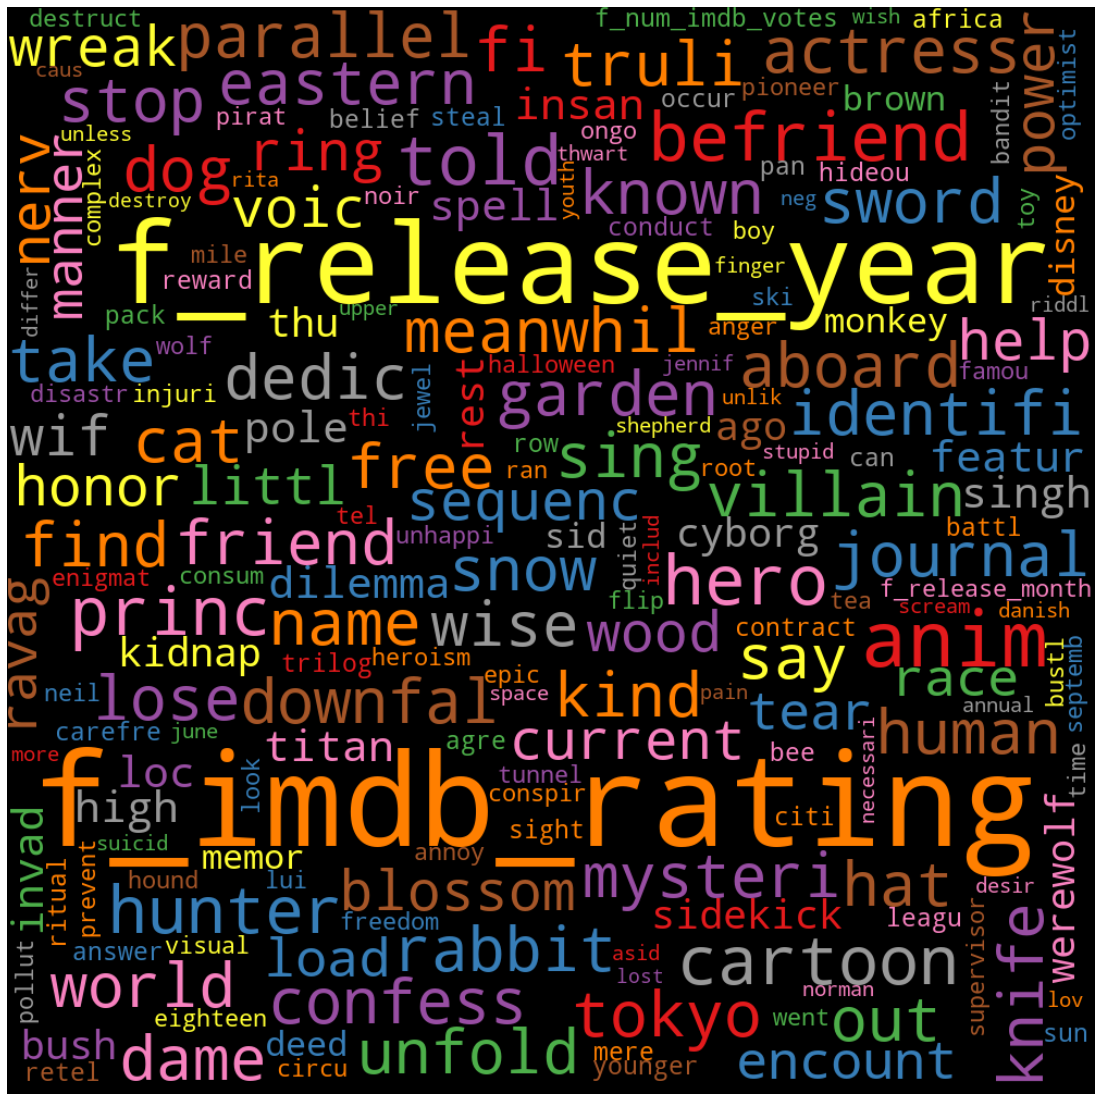

In [216]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud( width=2048, height=2048, background_color="black", colormap='Set1').generate_from_frequencies(animation_freq_dict)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [172]:
wordcloud.to_file("img/animation.png")

In [116]:
action_freq_dict = action_coef_df.to_dict()
action_freq_dict = action_freq_dict['g_action']

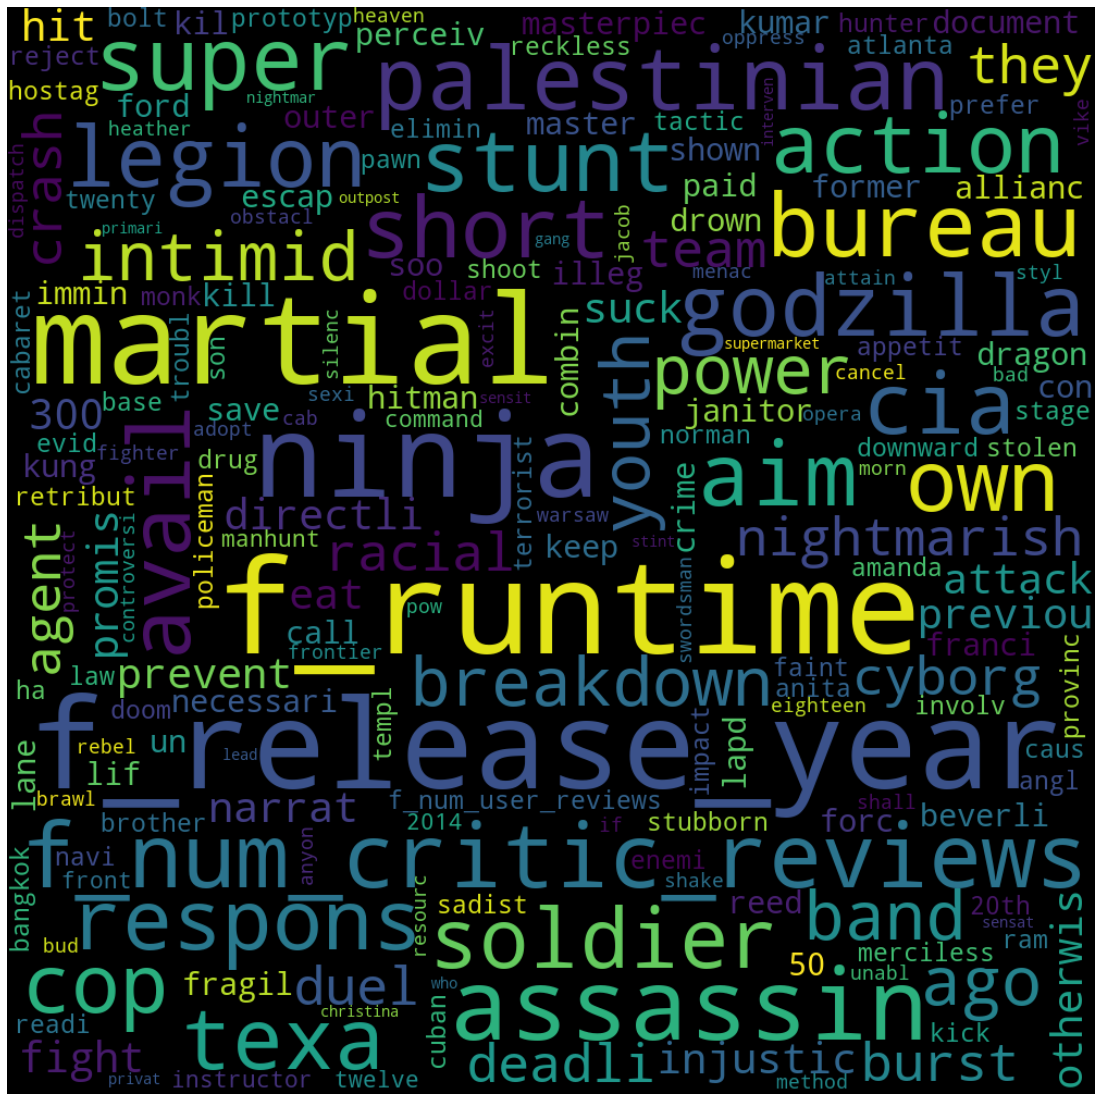

In [132]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#text = 
wordcloud = WordCloud(max_font_size=120, width=1000, height=1000, max_words=200, background_color="black").generate_from_frequencies(action_freq_dict)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

In [68]:
action_coef_df = coef_tdf[coef_tdf.columns[coef_tdf.columns == genre_cols[1]]]
action_coef_df.sort_values(genre_cols[1], ascending=False)

,adventure
num_critic_reviews,0.306125
america,0.301516
adventur,0.292967
vike,0.248250
pirat,0.236540
...,...
behavior,-0.357105
anew,-0.373368
poland,-0.380511
drama_x,-0.387129


In [191]:
len(musical_mask)

512

In [378]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


In [307]:
img = Image.open('img/masks/documentary-512.png').convert('LA')
img.save('documentary-gs.png')

In [415]:
musical_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [416]:
transformed_musical_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [419]:
musical_coef_df.sort_values('g_musical', ascending=False).head(20)

,g_musical
music,0.135645
danc,0.063251
wood,0.060561
tim,0.059275
india,0.058748
romanc,0.058130
west,0.057291
broadcast,0.056974
earn,0.056170
love,0.055075


In [411]:
bad_df = musical_coef_df.index.isin(f_names)
musical_coef_df = musical_coef_df[~bad_df]

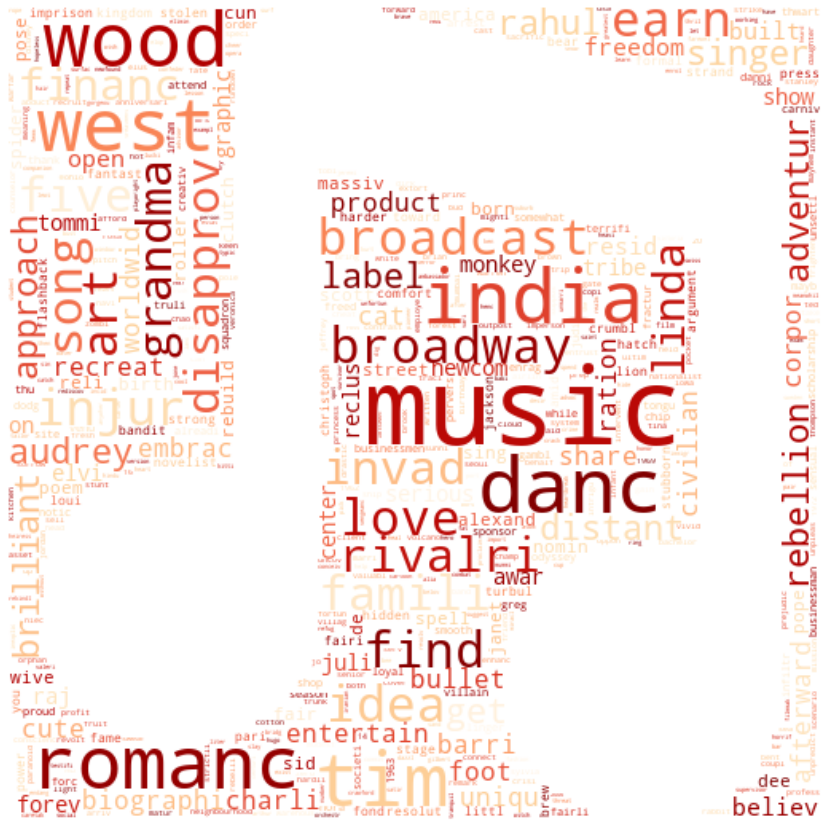

In [425]:
#musical_coef_df = coef_tdf[['g_musical']]
#musical_coef_df = musical_coef_df[ musical_coef_df['g_musical'] > 0 ]
musical_freq_dict = musical_coef_df.to_dict()
musical_freq_dict = musical_freq_dict['g_musical']

from PIL import Image
# Image is numpy array
musical_mask = np.array(Image.open('img/masks/musical-note-512-.png'))

# Transform your mask into a new one that will work with the function:
transformed_musical_mask = np.ndarray((musical_mask.shape[0],musical_mask.shape[1]), np.int32)

for i in range(len(musical_mask)):
    transformed_musical_mask[i] = list(map(transform_format, musical_mask[i]))


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Init
stop_words = [f_names] + list(STOPWORDS)
wc = WordCloud(background_color="white", width=1500, height=1500, max_words=500, mask=transformed_musical_mask, stopwords=stop_words, colormap='OrRd_r')

# generate word cloud
wc.generate_from_frequencies(musical_freq_dict)
#wc.generate(" ".join(coef_tdf[['g_musical']].index.values))

# store to file
wc.to_file('img/wc_img.png')

# show
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
for i, v in enumerate(coef_tdf['action']):
    #print(value.index.values)
    print(coef_tdf[coef_tdf['action'].index==i].index.values)
    break

[]


In [24]:
len(coefs)

22

In [58]:
y_test[y_test.action==True]

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
27517,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
28917,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
15165,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14608,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
27910,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
14113,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20497,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
22529,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
